# Vishal Talwar


# Data Science And Business Analytics Intern @Spark Foundation(TSF)

# Simple Linear Regression 

In [116]:
import pandas as pd    #For Data Manipulation
import numpy as np     #For Working with n-dimensional arrays

import matplotlib.pyplot as plt     #For visualization of data
import seaborn as sns               #For visulatization purpose


from sklearn.model_selection import train_test_split as ts  #For splitting our data
from sklearn.linear_model import LinearRegression   #algorithm for making model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
df =pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [5]:
#For inspecting first five rows of data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#For Inspecting rows selected at random
df.sample(10)

,Hours,Scores
21,4.8,54
2,3.2,27
22,3.8,35
13,3.3,42
20,2.7,30
1,5.1,47
18,6.1,67
12,4.5,41
3,8.5,75
24,7.8,86


In [9]:
#Checking Shape of our data
print("No. of rows are %i"%df.shape[0])
print("No of columns are %i "%df.shape[1])

No. of rows are 25
No of columns are 2 


In [10]:
#Checking data types of columns
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [11]:
#Checking Null values in our dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [17]:
#Checking for duplicate rows in our data
df.duplicated().sum()

0

In [19]:
#Looking at the statistical property of columns
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [21]:
#Checking for correlation in our data to check linearity assumption in Linear Regression
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


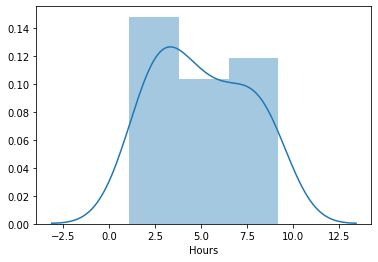

In [22]:
#Univariate Analysis
hour=sns.distplot(df['Hours'])

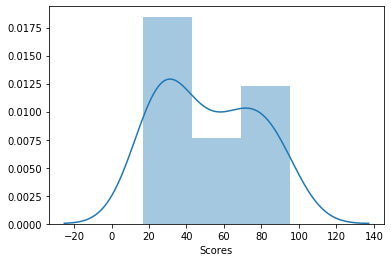

In [24]:
Score=sns.distplot(df["Scores"])

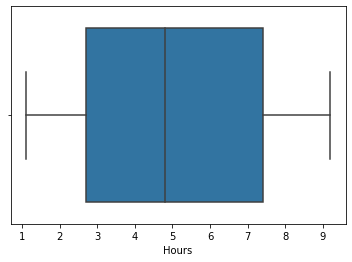

In [39]:
Hours=sns.boxplot(df['Hours'])
                  
#No outlier

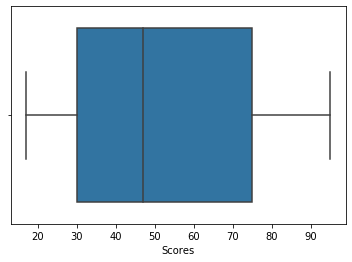

In [34]:
Score=sns.boxplot(df["Scores"])

#No outliers

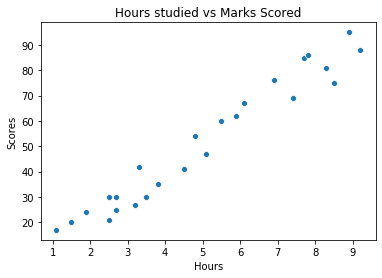

In [33]:
#Bivariate Analysis
sns.scatterplot(df["Hours"],df["Scores"]);
plt.title("Hours studied vs Marks Scored");

#Data is positive correlated 

In [68]:
#Assigning column to dependent and independent variable
X=df['Hours'].values.reshape(-1,1)
y=df['Scores'].values

In [69]:
#Splitting our data for training and predicting purpose
X_train,X_test,y_train,y_test=ts(X,y,test_size=0.2)

In [70]:
print(X_train.shape)
print(X_test.shape)

(20, 1)
(5, 1)


In [71]:
print(y_train.shape)
print(y_test.shape)

(20,)
(5,)


In [77]:
#Training our model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
print(model.coef_)
print(model.intercept_)

#Interpreting Model Coefficient
#A"Unit" increase in number of hours studied is associated with 9.955"units" in marks

[9.95084503]
1.4847149599514253


In [89]:
#Making prediction using test data
y_pred=model.predict(X_test)


In [90]:
#Comparing actual vs predicted scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,30,26.361828
1,67,62.184870
2,81,84.076729
3,69,75.120968
4,60,56.214363


In [118]:
#Evaluating our model
print("Mean absolute error is ",mean_absolute_error(y_pred,y_test))
print("r square value is",r2_score(y_pred,y_test))


Mean absolute error is  4.2873274190705635
r square value is 0.9500542668240033


In [119]:
#Conclusion
p=model.predict([[9.25]])
print("Number of hours studied are %f and predicted score is %f"%(9.25,p))

Number of hours studied are 9.250000 and predicted score is 93.530032
